In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pickle
from collections import Counter

In [43]:
def naive_method(graph, empty, attr):
    """   Predict the missing attribute with a simple but effective
    relational classifier. 
    
    The assumption is that two connected nodes are 
    likely to share the same attribute value. Here we chose the most frequently
    used attribute by the neighbors
    
    Parameters
    ----------
    graph : graph
       A networkx graph
    empty : list
       The nodes with empty attributes 
    attr : dict 
       A dict of attributes, either location, employer or college attributes. 
       key is a node, value is a list of attribute values.

    Returns
    -------
    predicted_values : dict 
       A dict of attributes, either location, employer or college attributes. 
       key is a node (from empty), value is a list of attribute values. Here 
       only 1 value in the list.
     """
    predicted_values={}
    for n in empty:
        nbrs_attr_values=[] 
        for nbr in graph.neighbors(n):
            if nbr in attr:
                for val in attr[nbr]:
                    nbrs_attr_values.append(val)
        predicted_values[n]=[]
        if nbrs_attr_values: # non empty list
            # count the number of occurrence each value and returns a dict
            cpt=Counter(nbrs_attr_values)
            # take the most represented attribute value among neighbors
            a,nb_occurrence=max(cpt.items(), key=lambda t: t[1])
            predicted_values[n].append(a)
    return predicted_values

def evaluation_accuracy(groundtruth, pred):
    """    Compute the accuracy of your model.

     The accuracy is the proportion of true results.

    Parameters
    ----------
    groundtruth :  : dict 
       A dict of attributes, either location, employer or college attributes. 
       key is a node, value is a list of attribute values.
    pred : dict 
       A dict of attributes, either location, employer or college attributes. 
       key is a node, value is a list of attribute values. 

    Returns
    -------
    out : float
       Accuracy.
    """
    true_positive_prediction=0   
    for p_key, p_value in pred.items():
        if p_key in groundtruth:
            # if prediction is no attribute values, e.g. [] and so is the groundtruth
            # May happen
            if not p_value and not groundtruth[p_key]:
                true_positive_prediction+=1
            # counts the number of good prediction for node p_key
            # here len(p_value)=1 but we could have tried to predict more values
            true_positive_prediction += len([c for c in p_value if c in groundtruth[p_key]])          
        # no else, should not happen: train and test datasets are consistent
    return true_positive_prediction*100/sum(len(v) for v in pred.values())

In [144]:
def open_pickle(file):
    attr = {}
    with open(file + '.pickle', 'rb') as handle:
        attr = pickle.load(handle)
    return attr

set_type = 'large' # Change here the set type

G = nx.read_gexf(set_type + 'Linkedin.gexf')
college = open_pickle(set_type + 'College')
empty_college = open_pickle(set_type + 'College_60percent_of_empty_profile')
employer = open_pickle(set_type + 'Employer')
empty_employer = open_pickle(set_type + 'Employer_60percent_of_empty_profile')
location = open_pickle(set_type + 'Location')
empty_location = open_pickle(set_type + 'Location_60percent_of_empty_profile')
empty_nodes = open_pickle(set_type + 'RemovedNodes_60percent_of_empty_profile')

In [145]:
predictions = naive_method(G, empty_nodes, empty_location) #
groundtruth = location #
result = evaluation_accuracy(groundtruth, predictions)
print("%f%% of the predictions are true" % result)

45.055491% of the predictions are true


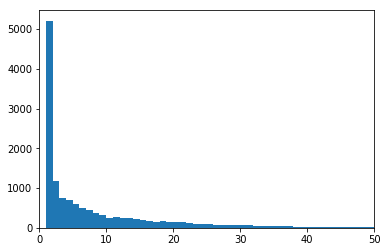

In [146]:
def graph_histogram(graph, attr={}):
    seq = []
    for n in graph.nodes:
        i = 0
        for nb in graph.neighbors(n):
            if not attr or nb in attr: i += 1
        seq.append(i)
    plt.hist(seq, max(seq))
    plt.xlim(0,50)
    plt.show()
            
graph_histogram(G)

In [147]:
"""def get_attr(graph, attr, n):
    for nb in graph(n):"""

def extend(array_of_arrays):
    extended_array = []
    for array in array_of_arrays:
        for val in array:
            extended_array.append(val)
    return extended_array
        
def second_method(graph, empty, attr):
    predicted_values = {}
    for n in empty:
        nbrs = []
        for nb in graph.neighbors(n):
            if nb in attr: nbrs.append(attr[nb])
        if len(nbrs) >= 7: 
            nbrs = extend(nbrs)
            cpt = Counter(nbrs)
            a, nb_occurrence = max(cpt.items(), key=lambda t: t[1])
            predicted_values[n] = [a]
    return predicted_values

def premier_method(graph, empty, attr):
    predicted_values = {}
    for n in empty:
        i = 0
        for nb in graph.neighbors(n):
            if nb in attr: 
                i += 1
                aux = nb
        """if i < 3:
            nbrs = []
            for nb1 in graph.neighbors(n):
                for nb2 in graph.neighbors(nb1):
                    for nb3 in graph.neighbors(nb2):
                        if nb3 in attr:
                            for val in attr[nb3]:
                                nbrs.append(val)
            if nbrs:
                cpt = Counter(nbrs)
                a, nb_occurrence = max(cpt.items(), key=lambda t: t[1])
                predicted_values[n] = [a] """
        if i == 1:
            predicted_values[n] = attr[aux]
    return predicted_values

def evaluate(groundtruth, predicted):
    a = 0
    b = 0
    for n in predicted:
        if n in groundtruth:
            a += 1
            if predicted[n] == groundtruth[n]:
                b += 1
    return b/a
        
predictions = second_method(G, empty_nodes, empty_location)
print(evaluate(location, predictions))

0.5069191551347414


In [41]:
def naive_method(graph, empty, attr):
    predicted_values = {}
    for n in empty:
        nbrs_attr_values = [] 
        for nbr in graph.neighbors(n):
            if nbr in attr:
                for val in attr[nbr]:
                    nbrs_attr_values.append(val)
        predicted_values[n] = []
        if nbrs_attr_values: 
            cpt = Counter(nbrs_attr_values)
            a, nb_occurrence = max(cpt.items(), key=lambda t: t[1])
            predicted_values[n].append(a)
    return predicted_values

In [40]:
attr = location

a = 0
for n in attr:
    nbrs = []
    for nb in G.neighbors(n):
        if nb in attr:
            for val in attr[nb]:
                nbrs.append(val)
    if nbrs: 
        cpt=Counter(nbrs)
        k, v = max(cpt.items(), key=lambda t: t[1])
        for i in attr[n]:
            if k == i:
                a = a+1

print(a/540)

0.4777777777777778


In [96]:
len(G.nodes)

811